In [ ]:
# y = 3.2 + 1.87x
# 1. slope = 1.87. Interpretation: On average, for one unit of increase in x, y increased by 1.87.
# 2. R^2 = 89%. Interpretation: On average, 89% of the variability in y can be explained by a linear model in 
# which x is the predictor variable.
# 3. x = 3.2 => y = 3.2 + 1.87*3.2 = 9.184

In [12]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import statsmodels.formula.api as smf

# Reading the csv file
batting = pd.read_csv('Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [13]:
batting_agg = batting.groupby('playerID')[['AB', 'HR', 'SO']].sum().reset_index()
batting_agg.columns = ['playerID', 'tot_AB', 'tot_HR', 'tot_SO']
batting_agg

,playerID,tot_AB,tot_HR,tot_SO
0,aardsda01,4,0,2.0
1,aaronha01,12364,755,1383.0
2,aaronto01,944,13,145.0
3,aasedo01,5,0,3.0
4,abadan01,21,0,5.0
...,...,...,...,...
19893,zupofr01,18,0,6.0
19894,zuvelpa01,491,2,50.0
19895,zuverge01,142,0,39.0
19896,zwilldu01,1280,30,155.0


In [14]:
batting_agg.describe()

,tot_AB,tot_HR,tot_SO
count,19898.000000,19898.000000,19898.000000
mean,761.278721,15.582722,110.237511
std,1595.168349,50.572490,233.288950
min,0.000000,0.000000,0.000000
25%,5.000000,0.000000,1.000000
50%,67.000000,0.000000,13.000000
75%,586.000000,4.000000,101.000000
max,14053.000000,762.000000,2597.000000


In [15]:
## selecting players with tot_AB > 5000
batting_agg = batting_agg[batting_agg['tot_AB'] > 5000].reset_index(drop = True)
batting_agg

,playerID,tot_AB,tot_HR,tot_SO
0,aaronha01,12364,755,1383.0
1,abreubo01,8480,288,1840.0
2,adamssp01,5557,9,223.0
3,adcocjo01,6606,336,1059.0
4,alfoned01,5385,146,617.0
...,...,...,...,...
801,zeileto01,7573,253,1279.0
802,zimmehe01,5304,58,432.0
803,zimmery01,6399,270,1307.0
804,ziskri01,5144,207,910.0


In [16]:
batting_agg['HR_rate'] = batting_agg['tot_HR'] / batting_agg['tot_AB']
batting_agg['SO_rate'] = batting_agg['tot_SO'] / batting_agg['tot_AB']
batting_agg

,playerID,tot_AB,tot_HR,tot_SO,HR_rate,SO_rate
0,aaronha01,12364,755,1383.0,0.061064,0.111857
1,abreubo01,8480,288,1840.0,0.033962,0.216981
2,adamssp01,5557,9,223.0,0.001620,0.040130
3,adcocjo01,6606,336,1059.0,0.050863,0.160309
4,alfoned01,5385,146,617.0,0.027112,0.114578
...,...,...,...,...,...,...
801,zeileto01,7573,253,1279.0,0.033408,0.168889
802,zimmehe01,5304,58,432.0,0.010935,0.081448
803,zimmery01,6399,270,1307.0,0.042194,0.204251
804,ziskri01,5144,207,910.0,0.040241,0.176905


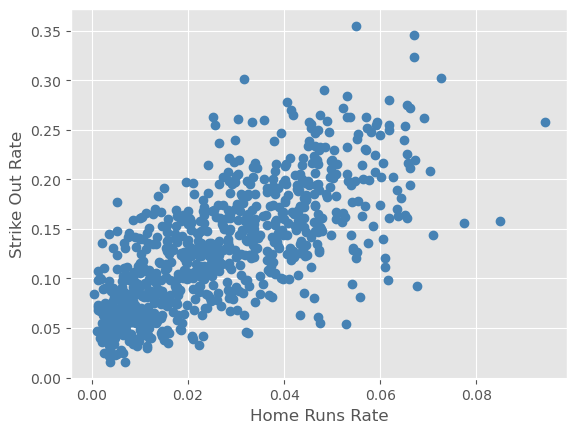

In [17]:
plt.plot('HR_rate', 'SO_rate', 'o', data = batting_agg, color = 'steelblue')
plt.xlabel('Home Runs Rate')
plt.ylabel('Strike Out Rate');

In [18]:
# From the above chart, we see the that HR rate and SO rate have a approx linear relationship.

In [19]:
# Building the linear model 
lm_md = smf.ols(formula = 'SO_rate ~ HR_rate', data = batting_agg).fit()

# Predicting on new observation
new_obs = pd.DataFrame({'HR_rate': [0.05]})
lm_md.predict(new_obs)

0    0.186524
dtype: float64